In [72]:
from denoiser import pretrained
from denoiser.dsp import convert_audio
import torchaudio
import torch
import librosa
import numpy as np
from IPython.display import display, Audio
import logmmse
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [73]:
model = pretrained.dns64()
wav, sr = torchaudio.load('new.wav')

wav = convert_audio(wav, sr, model.sample_rate, model.chin)

with torch.no_grad():
    denoised = model(wav[None])[0]

display(Audio(denoised, rate=model.sample_rate))

In [74]:
denoised_np = denoised.squeeze().numpy()
wav_np = wav.squeeze().numpy()
'''
S_denoised, phase0 = librosa.magphase(librosa.stft(denoised_np, n_fft=1024))
S_wav, phase1 = librosa.magphase(librosa.stft(wav_np, n_fft=1024))

y_new = librosa.istft((S_wav-S_denoised)*phase1, n_fft=1024)

display(Audio(y_new, rate=model.sample_rate))'''

'\nS_denoised, phase0 = librosa.magphase(librosa.stft(denoised_np, n_fft=1024))\nS_wav, phase1 = librosa.magphase(librosa.stft(wav_np, n_fft=1024))\n\ny_new = librosa.istft((S_wav-S_denoised)*phase1, n_fft=1024)\n\ndisplay(Audio(y_new, rate=model.sample_rate))'

In [75]:
S_wav_fft = np.fft.fft(wav_np)
S_denoised_fft = np.fft.fft(denoised_np)

#y_fft_new = np.fft.ifft(S_wav_fft-S_denoised_fft)

In [78]:
'''for i in range(0, len(S_denoised_fft)):
    dist0.append(np.minimum(np.abs(S_wav_fft[i]), np.abs(S_denoised_fft[i])))'''
'''dist = cosine(np.abs(S_denoised_fft), np.abs(S_wav_fft))
print(dist)
'''
S_fft_new = np.minimum(np.abs(S_wav_fft), np.abs(S_denoised_fft))
y_fft_new = np.fft.ifft(S_fft_new)
y_org = np.fft.ifft(S_wav_fft)

display(Audio((y_fft_new.real), rate=16000))
display(Audio((y_org.real), rate=16000))

print(y_fft_new.shape, y_fft_new.dtype, y_org.shape, y_org.dtype, np.abs(y_org).dtype)

(361600,) complex128 (361600,) complex128 float64


In [91]:
y_org0 = (y_org.real - y_org.real.min())/(y_org.real.max() - y_org.real.min())
y_fft_new0 = (y_fft_new.real - y_fft_new.real.min())/(y_fft_new.real.max() - y_fft_new.real.min())
np.min(y_fft_new.real), np.min(y_org.real), cosine(y_fft_new.real, y_org.real)

(-0.5201882334841017, -0.570281982421875, 1.0030064543321584)

In [97]:
y_org0 = (y_org.real - y_org.real.min())/(y_org.real.max() - y_org.real.min())
y_fft_new0 = (y_fft_new.real - y_fft_new.real.min())/(y_fft_new.real.max() - y_fft_new.real.min())

S_org, phase0 = librosa.magphase(librosa.stft((y_org0)))
S_new, phase1 = librosa.magphase(librosa.stft((y_fft_new0)))

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_org, ref=np.max),
                         y_axis='log', sr=16000)
plt.title('Org')
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_new, ref=np.max),
                         y_axis='log', sr=16000)
plt.title('New')
plt.colorbar()

Error in callback <function _draw_all_if_interactive at 0x7f6bfb389440> (for post_execute):


FloatingPointError: underflow encountered in multiply

FloatingPointError: underflow encountered in multiply

<Figure size 1000x600 with 4 Axes>

Error in callback <function _draw_all_if_interactive at 0x7f6bfb389440> (for post_execute):


FloatingPointError: underflow encountered in multiply

FloatingPointError: underflow encountered in multiply

<Figure size 1000x600 with 4 Axes>

In [39]:
dist = []
for i in range(0, len(S_wav)):
    dist.append(cosine(S_wav[i], S_denoised[i]))

np.mean(dist), np.max(dist), np.min(dist)

(0.6120127377483348, 0.8961238637566566, 0.11175590753555298)

In [48]:
S_new = S_wav
for i in range(0, len(dist)):
    if dist[i]>0.7:
        S_new[i] = np.zeros(S_wav[i].shape, S_wav.dtype)

y_new = librosa.istft(S_new*phase1)
display(Audio(y_new, rate=model.sample_rate))

FloatingPointError: invalid value encountered in divide

In [35]:
plt.figure(figsize=(10, 6))

librosa.display.specshow(librosa.amplitude_to_db(S_wav, ref=np.max),
                         y_axis='log', sr=16000)
plt.title('Full spectrum')
plt.colorbar()

Error in callback <function _draw_all_if_interactive at 0x7f6bfb389440> (for post_execute):


FloatingPointError: underflow encountered in multiply

FloatingPointError: underflow encountered in multiply

<Figure size 1000x600 with 2 Axes>

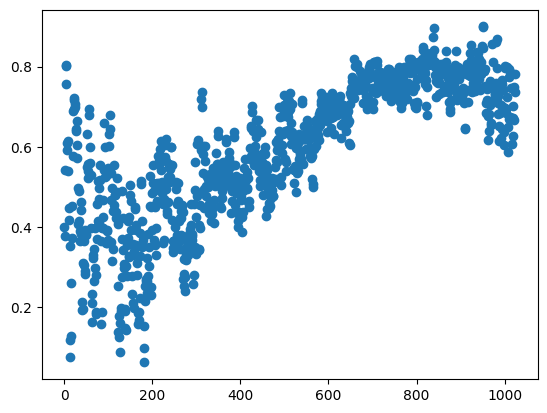

In [36]:
plt.scatter([i for i in range(0, len(dist))], dist)
plt.show()